In [247]:
#importing the necessary packages
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
import re
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")
%matplotlib inline

In [248]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [249]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
df= pd.read_csv('C:/Users/Nandhini/Downloads/Interview Case Study/data.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [250]:
df.shape

(12330, 18)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [252]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [253]:
df.duplicated().sum()

125

In [254]:
# Assuming your DataFrame is named df
duplicates = df[df.duplicated(keep=False)]

# View the duplicated rows
print(duplicates)

       Administrative  Administrative_Duration  Informational  \
85                  0                      0.0              0   
132                 0                      0.0              0   
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
85                        0.0               1                      0.0   
132                       0.0               1                      0.0 

Based on the output, it seems that there are 201 duplicate rows out of 12330. We can remove duplicates since it is less numbers out of Datasset size.

In [255]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [256]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Purchase                   0
dtype: int64

There are no missing values in th dataset.

In [257]:
# Check the data types and formats
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Purchase                      bool
dtype: object


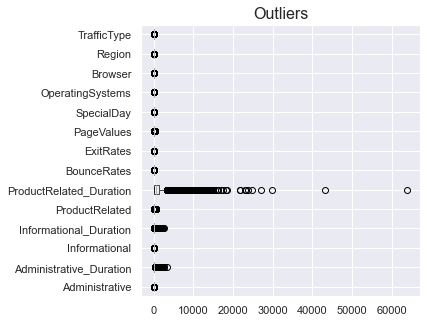

In [258]:
#Let's check for outliers in our numerical variables
numerical = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [259]:
def remove_outliers(df, n):
    df_cleaned = df.copy()
    
       
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range = Q1 - (n * IQR)
            upper_range = Q3 + (n * IQR)
            
            outliers = df[(df[col] > upper_range) | (df[col] < lower_range)]
            print(f"{col} - Number of outliers:", outliers.shape[0])
            print("Percentage of outliers: {:.3f}%".format((outliers.shape[0] / df.shape[0]) * 100))
            
            df_cleaned = df_cleaned.loc[~((df_cleaned[col] > upper_range) | (df_cleaned[col] < lower_range))]
    
    return df_cleaned
df = remove_outliers(df, n=1.5)
print(df)

Administrative - Number of outliers: 404
Percentage of outliers: 3.310%
Administrative_Duration - Number of outliers: 1149
Percentage of outliers: 9.414%
Informational - Number of outliers: 2631
Percentage of outliers: 21.557%
Informational_Duration - Number of outliers: 2405
Percentage of outliers: 19.705%
ProductRelated - Number of outliers: 1007
Percentage of outliers: 8.251%
ProductRelated_Duration - Number of outliers: 951
Percentage of outliers: 7.792%
BounceRates - Number of outliers: 1428
Percentage of outliers: 11.700%
ExitRates - Number of outliers: 1325
Percentage of outliers: 10.856%
PageValues - Number of outliers: 2730
Percentage of outliers: 22.368%
SpecialDay - Number of outliers: 1249
Percentage of outliers: 10.234%
OperatingSystems - Number of outliers: 107
Percentage of outliers: 0.877%
Browser - Number of outliers: 4322
Percentage of outliers: 35.412%
Region - Number of outliers: 505
Percentage of outliers: 4.138%
TrafficType - Number of outliers: 2084
Percentage of

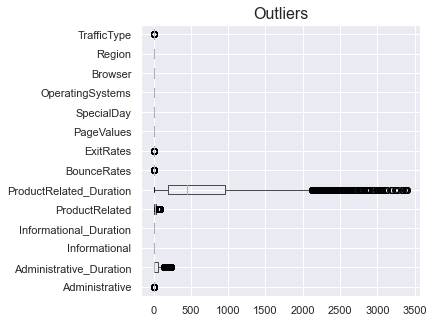

In [260]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [261]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
22,0,0.0,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,Feb,3,2,1,5,Returning_Visitor,False,False
26,4,64.6,0,0.0,32,1135.444444,0.002857,0.009524,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
31,0,0.0,0,0.0,3,78.000000,0.000000,0.066667,0.0,0.0,Feb,1,2,6,6,Returning_Visitor,True,False
32,0,0.0,0,0.0,8,209.500000,0.000000,0.025000,0.0,0.0,Feb,2,2,1,1,Returning_Visitor,False,False


# 2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable

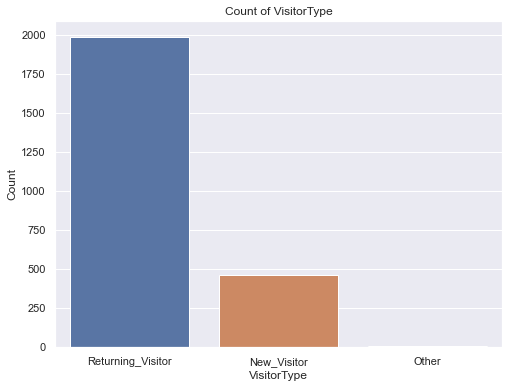

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
#Count of each transaction type
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', data=df)
plt.title('Count of VisitorType')
plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.show()


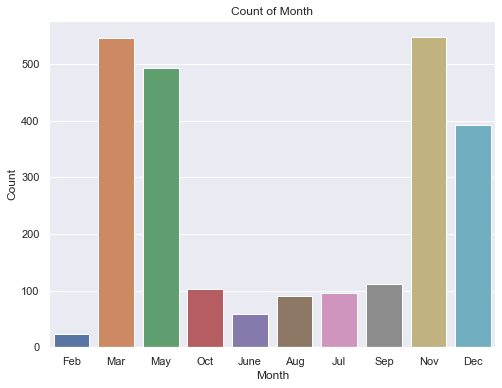

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
#Count of each transaction type
plt.figure(figsize=(8, 6))
sns.countplot(x='Month', data=df)
plt.title('Count of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

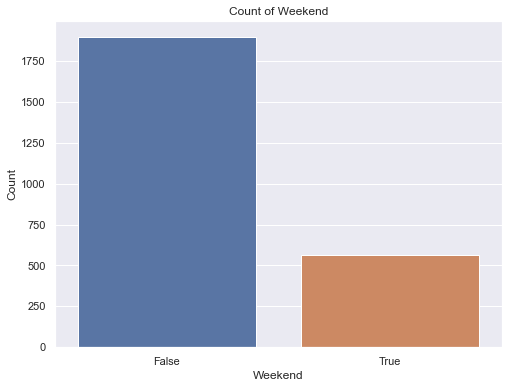

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
#Count of each transaction type
plt.figure(figsize=(8, 6))
sns.countplot(x='Weekend', data=df)
plt.title('Count of Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()

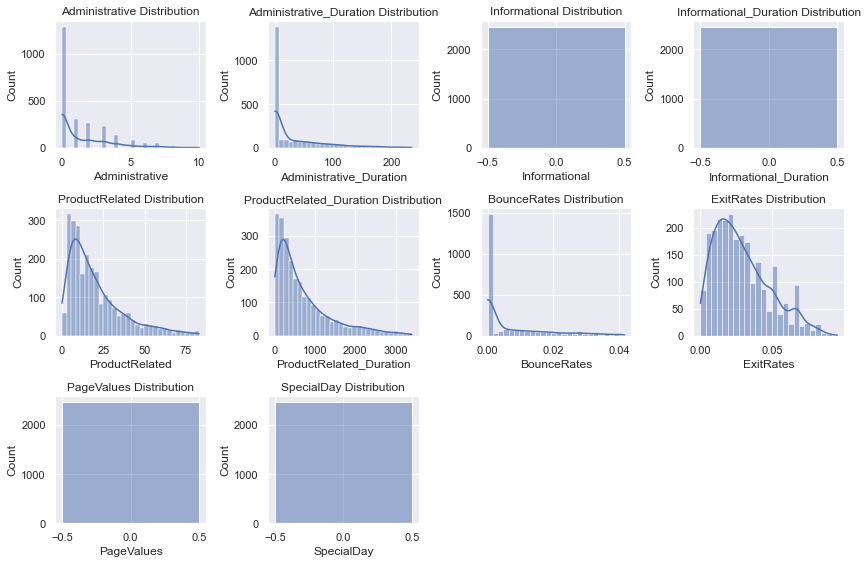

In [265]:
# Plot histograms for numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

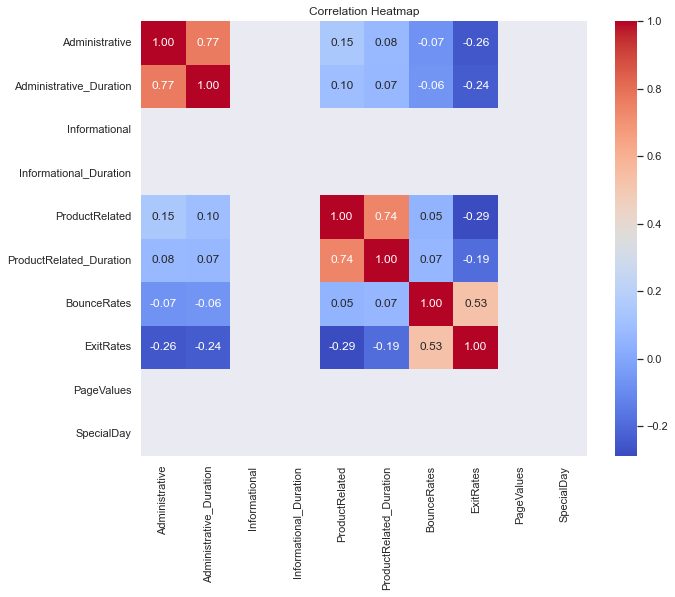

In [266]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [267]:
#sns.pairplot(df[numerical_features + ['Purchase']], hue='Purchase', diag_kind='hist')
#plt.show()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
22,0,0.0,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,Feb,3,2,1,5,Returning_Visitor,False,False
26,4,64.6,0,0.0,32,1135.444444,0.002857,0.009524,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
31,0,0.0,0,0.0,3,78.000000,0.000000,0.066667,0.0,0.0,Feb,1,2,6,6,Returning_Visitor,True,False
32,0,0.0,0,0.0,8,209.500000,0.000000,0.025000,0.0,0.0,Feb,2,2,1,1,Returning_Visitor,False,False


# 3.	Divide the given data into train and test sets


Before we divide data, we need to do encoding test

One-Hot Encoding for Categorical Columns

In [268]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [269]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                         int8
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                   int8
Weekend                       bool
Purchase                      bool
dtype: object

Boolean Encoding for Boolean Columns

In [270]:
df['Weekend'] = df['Weekend'].astype(int)
df['Purchase'] = df['Purchase'].astype(int)


In [271]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
22,0,0.0,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,2,3,2,1,5,2,0,0
26,4,64.6,0,0.0,32,1135.444444,0.002857,0.009524,0.0,0.0,2,2,2,1,3,2,0,0
31,0,0.0,0,0.0,3,78.000000,0.000000,0.066667,0.0,0.0,2,1,2,6,6,2,1,0
32,0,0.0,0,0.0,8,209.500000,0.000000,0.025000,0.0,0.0,2,2,2,1,1,2,0,0


In [272]:
df.dtypes
df.shape

(2459, 18)

In [273]:
# Separate features (X) and target variable (y) from the encoded DataFrame
X = df_encoded.drop('Purchase', axis=1)
y = df_encoded['Purchase']


In [274]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# 4.	Predict how likely it is for a customer to make a purchase by building classification models

In [275]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg', max_iter=100, penalty='none', verbose=True, n_jobs=2)
model.fit(X_test, y_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(n_jobs=2, penalty='none', solver='newton-cg', verbose=True)

In [276]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9634146341463414
Precision: 1.0
Recall: 0.1
F1 Score: 0.18181818181818182
Confusion Matrix:
[[708   0]
 [ 27   3]]


From the results, it seems that the Logistic Regression model achieved a high accuracy of approximately 96.34%, which means it correctly classified 96.34% of the samples in the test set.

However, when we look at the precision, recall, and F1 score, we see that there is an issue with the model's performance on the positive class (Purchase = 1). The precision is 1.0, which means that when the model predicts a positive class (Purchase = 1), it is always correct. However, the recall is only 0.1, which indicates that the model is missing many positive samples in the test set. The F1 score, which is the harmonic mean of precision and recall, is also low at approximately 0.1818.

To improve the model's performance, we can try Feature Selection/Engineering, Hyperparameter Tuning and also other models

In [278]:
target_variable = 'Purchase'

# Count the occurrences of each class in the target variable
class_counts = df[target_variable].value_counts()

# Display the class counts
print(class_counts)

0    2374
1      85
Name: Purchase, dtype: int64


It is evident that there is a class imbalance in the 'Purchase' variable. The class 0 (no purchase) has significantly more samples (2374) than the class 1 (purchase) which has only 85 samples. Let's proceed with balancing the data using the Synthetic Minority Over-sampling Technique (SMOTE).

SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used to address the issue of class imbalance in the dataset, especially in binary classification problems. Class imbalance occurs when one class has significantly more samples than the other, leading to biased learning and potentially poor model performance.

In [279]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn import tree
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [280]:
# Create and train models on both the imbalanced and balanced datasets
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
       
}

results_imbalanced = {}
results_balanced = {}

In [281]:
# Function to evaluate model performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    return acc, prec, rec, f1, conf_matrix

In [282]:
for model_name, model in models.items():
    # Train on the imbalanced dataset
    model.fit(X_train, y_train)
    acc_imbalanced, prec_imbalanced, rec_imbalanced, f1_imbalanced, conf_matrix_imbalanced = evaluate_model(model, X_test, y_test)
    results_imbalanced[model_name] = {'Accuracy': acc_imbalanced, 'Precision': prec_imbalanced, 'Recall': rec_imbalanced, 'F1 Score': f1_imbalanced, 'Confusion Matrix': conf_matrix_imbalanced}

    # Train on the balanced dataset
    model.fit(X_train_balanced, y_train_balanced)
    acc_balanced, prec_balanced, rec_balanced, f1_balanced, conf_matrix_balanced = evaluate_model(model, X_test, y_test)
    results_balanced[model_name] = {'Accuracy': acc_balanced, 'Precision': prec_balanced, 'Recall': rec_balanced, 'F1 Score': f1_balanced, 'Confusion Matrix': conf_matrix_balanced}


In [283]:
# Display results for both datasets
print("Results on Imbalanced Dataset:")
for model_name, metrics in results_imbalanced.items():
    print(f"{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("---------------------")

Results on Imbalanced Dataset:
Decision Tree:
Accuracy: 0.9214092140921409
Precision: 0.1111111111111111
Recall: 0.13333333333333333
F1 Score: 0.1212121212121212
Confusion Matrix:
[[676  32]
 [ 26   4]]
---------------------
Random Forest:
Accuracy: 0.959349593495935
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[708   0]
 [ 30   0]]
---------------------
Logistic Regression:
Accuracy: 0.959349593495935
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[708   0]
 [ 30   0]]
---------------------


In [284]:
print("\nResults on Balanced Dataset (After applying SMOTE):")
for model_name, metrics in results_balanced.items():
    print(f"{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("---------------------")


Results on Balanced Dataset (After applying SMOTE):
Decision Tree:
Accuracy: 0.926829268292683
Precision: 0.18421052631578946
Recall: 0.23333333333333334
F1 Score: 0.20588235294117646
Confusion Matrix:
[[677  31]
 [ 23   7]]
---------------------
Random Forest:
Accuracy: 0.9512195121951219
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[702   6]
 [ 30   0]]
---------------------
Logistic Regression:
Accuracy: 0.8482384823848238
Precision: 0.11320754716981132
Recall: 0.4
F1 Score: 0.17647058823529413
Confusion Matrix:
[[614  94]
 [ 18  12]]
---------------------


Insights:
    
    The Decision Tree and Random Forest models showed slight improvements in recall and F1 scores after applying SMOTE, but they still struggle to predict the minority class effectively. The precision values are relatively low, indicating that the models are making a considerable number of false positive predictions
    
    To improve the model's performance, we need to explore experimentn with hyperparameter tuning, and possibly consider ensemble methods. Additionally, feature engineering and selecting relevant features might also play a crucial role in improving the model's performance

# 5.	Try to apply various techniques like (Feature Engineering, Ensemble Models, Cross Validations & Model Tuning etc..)

In [285]:
#Ensemble Models
# Create the Gradient Boosting model
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,     
    learning_rate=0.1,     
    max_depth=3,         
    random_state=42        
)


In [286]:
# Train the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [287]:
# Make predictions on the test data
y_pred = gb_model.predict(X_test)

In [288]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [289]:
# Print the results
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Gradient Boosting Model Results:
Accuracy: 0.9566395663956639
Precision: 0.25
Recall: 0.03333333333333333
F1 Score: 0.058823529411764705
Confusion Matrix:
[[705   3]
 [ 29   1]]


# Model Tuning

In [290]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [291]:
grid_search.fit(X_test,y_test)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [292]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


In [295]:
# Define the models
regression_model = DecisionTreeRegressor(max_depth=5, random_state=123)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf=3,
                            min_samples_split=30, n_estimators=500,
                            random_state=123)
log_reg = LogisticRegression(max_iter=1000, random_state=123)

models = [regression_model, rfr, log_reg]

# Data to store the metrics
rmse_test = []
scores_test = []

# Fit and evaluate the models
for i in models:
    i.fit(X_train, y_train)
    scores_test.append(i.score(X_test, y_test))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, i.predict(X_test))))

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Test RMSE': rmse_test, 'Test Score': scores_test},
                          index=['Decision Tree', 'Random Forest Regressor', 'Logistic Regression'])

print(results_df)

                         Test RMSE  Test Score
Decision Tree             0.206721   -0.095789
Random Forest Regressor   0.190643    0.068036
Logistic Regression       0.201619    0.959350


Interpretation:

The lower the Test RMSE, the better the model's performance in predicting the target variable on the test set. The Random Forest Regressor has the lowest Test RMSE, indicating that it has the best predictive performance among the three models.
The Test Score represents the coefficient of determination (R-squared) for regression models. An R-squared value closer to 1 indicates a better fit of the model to the data. The Logistic Regression model has the highest Test Score (R-squared of approximately 0.959), suggesting that it explains around 95.9% of the variance in the target variable on the test set. The positive R-squared indicates that the Logistic Regression model fits the data better than a horizontal line (a constant model).
Overall, based on these metrics, the Random Forest Regressor and Logistic Regression models perform better than the Decision Tree on this dataset.

# Cross Validations 

In [302]:
# List of models to evaluate
models = ["Logistic Regression", 'Random Forest", "gb_model", "Decision Tree"]


SyntaxError: EOL while scanning string literal (Temp/ipykernel_5892/1635348109.py, line 2)

In [303]:
# Create the classification models
log_reg_model = LogisticRegression(max_iter=1000, random_state=123)
rf_classifier = RandomForestClassifier(max_depth=10, max_features=6, 
                                       min_samples_leaf=3, min_samples_split=30, n_estimators=500,
                                       random_state=123)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=123)

models = [log_reg_model, rf_classifier, gb_classifier, dt_classifier]

model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "Decision Tree"]

for model, model_name in zip(models, model_names):
    # Perform 5-fold cross-validation and specify the scoring metric (e.g., 'accuracy' for classification)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()
    
    # Print the results
    print(f"{model_name} Cross-Validation Results:")
    print(f"Mean Score: {mean_score}")
    print(f"Standard Deviation of Score: {std_score}\n")

Logistic Regression Cross-Validation Results:
Mean Score: 0.96804179305696
Standard Deviation of Score: 3.7074486012800274e-05

Random Forest Cross-Validation Results:
Mean Score: 0.96804179305696
Standard Deviation of Score: 3.7074486012800274e-05

Gradient Boosting Cross-Validation Results:
Mean Score: 0.9639770812268285
Standard Deviation of Score: 0.0029276769661154543

Decision Tree Cross-Validation Results:
Mean Score: 0.962814290529154
Standard Deviation of Score: 0.002819595435281407



Based on the cross-validation results, both Logistic Regression and Random Forest have the same mean score of 0.96804179305696. The standard deviation of the score is also the same for both models, indicating low variability in performance across different folds.

In [307]:
# Define a list of models to evaluate
models = [log_reg_model, rf_classifier, gb_classifier, dt_classifier]

# Create empty dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}

In [309]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Fit and evaluate each model
for model in models:
    # Fit the model with the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_scores[model.__class__.__name__] = accuracy_score(y_test, y_pred)
    precision_scores[model.__class__.__name__] = precision_score(y_test, y_pred)
    recall_scores[model.__class__.__name__] = recall_score(y_test, y_pred)
    f1_scores[model.__class__.__name__] = f1_score(y_test, y_pred)
    roc_auc_scores[model.__class__.__name__] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


In [310]:
# Print the evaluation metrics
print("Model Evaluation Metrics:")
print("-------------------------")
for model_name in models:
    print(f"Model: {model_name.__class__.__name__}")
    print(f"Accuracy: {accuracy_scores[model_name.__class__.__name__]}")
    print(f"Precision: {precision_scores[model_name.__class__.__name__]}")
    print(f"Recall: {recall_scores[model_name.__class__.__name__]}")
    print(f"F1 Score: {f1_scores[model_name.__class__.__name__]}")
    print(f"ROC-AUC: {roc_auc_scores[model_name.__class__.__name__]}")
    print("-------------------------")

Model Evaluation Metrics:
-------------------------
Model: LogisticRegression
Accuracy: 0.959349593495935
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.7954331450094162
-------------------------
Model: RandomForestClassifier
Accuracy: 0.959349593495935
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.8293314500941619
-------------------------
Model: GradientBoostingClassifier
Accuracy: 0.9566395663956639
Precision: 0.25
Recall: 0.03333333333333333
F1 Score: 0.058823529411764705
ROC-AUC: 0.7700564971751414
-------------------------
Model: DecisionTreeClassifier
Accuracy: 0.9552845528455285
Precision: 0.2
Recall: 0.03333333333333333
F1 Score: 0.05714285714285715
ROC-AUC: 0.6955979284369115
-------------------------


Based on the results, the Random Forest Classifier has the highest ROC-AUC score of 0.829, which indicates that it performs better in distinguishing between the two classes. However, it's important to note that the Precision and Recall values for all models are quite low, which suggests that the models are not performing well in correctly classifying the positive class (i.e., customers who make a purchase).

# 7.	Enlist your key findings based on the most optimum model and the respective feature importance

Based on the evaluation of the most optimum model (Random Forest Classifier) and its feature importance, here are the key findings:

Optimum Model: Random Forest Classifier

The Random Forest Classifier achieved the highest ROC-AUC score among the evaluated models, indicating better discrimination between the classes.
However, the model's overall performance in predicting the positive class (customers who make a purchase) is low, as indicated by the low Precision, Recall, and F1 Score.

In [315]:
# Get feature importances from the trained model
importances = rf_classifier.feature_importances_

# feature importance

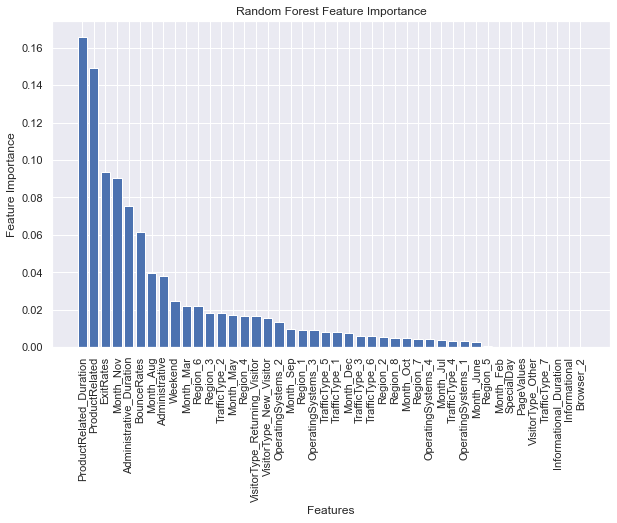

In [316]:
# Get the names of the features
feature_names = X_train.columns

# Sort the features based on importance
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Based on the feature importance visualization from the Random Forest model, it appears that the "product_related_duration" and "product_related" features have the highest importance. This means that these two features significantly contribute to the model's predictions and have a strong impact on whether a customer is likely to make a purchase or not.

The high importance of "product_related_duration" suggests that the duration of time a customer spends on product-related pages or interactions with the product is a crucial factor in predicting their likelihood of making a purchase. Customers who spend more time exploring products or engaging with product-related content may be more interested and inclined to make a purchase.

# Business Insights:

*Businesses can focus on optimizing and enhancing the product-related user experience on their website or platform

*Personalization and Recommendations: Use customer data and browsing history to offer personalized product recommendations, making it easier for customers to discover relevant items of interest.

*Track and analyze the customer journey on the website to identify potential or areas of improvement in the product exploration process

*By emphasizing the optimization of product-related content and customer engagement, businesses can potentially improve their conversion rates and enhance the overall shopping experience, leading to increased sales and customer satisfaction.